Import all the libraries and the dataset

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

filename="C:\ML\Game_rating.csv"
df=pd.read_csv(filename)

In [14]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Find the total null values in the dataset

In [15]:
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [17]:
df.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,0.118206,...,0.013193,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852
std,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,0.322937,...,0.114129,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Univariate analysis

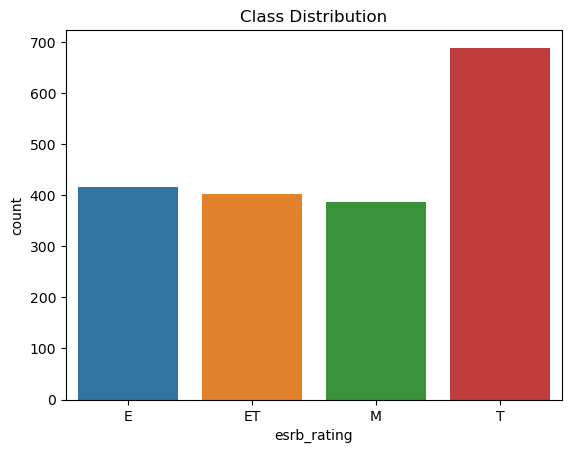

In [18]:
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution")
plt.show()

We see that there are more games in the Teen rating compared to the rest

Multivariate analysis

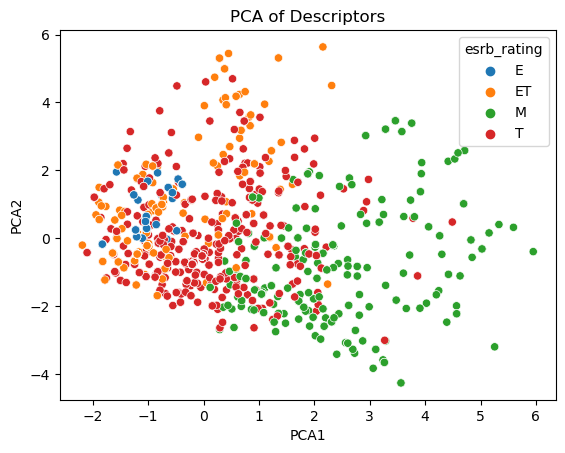

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:-1]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='esrb_rating')
plt.title('PCA of Descriptors')
plt.show()

Overlap implies there are common characteristics between the classes

Drop columns not required

In [41]:
from sklearn.preprocessing import LabelEncoder
df=df.drop(['title'],axis=1)
df=df.drop(['PCA1'],axis=1)
df=df.drop(['PCA2'],axis=1)

Converting target variable from object to int

In [42]:
label_encoder = LabelEncoder()
df['esrb_rating'] = label_encoder.fit_transform(df['esrb_rating'])

Bivariate analsis

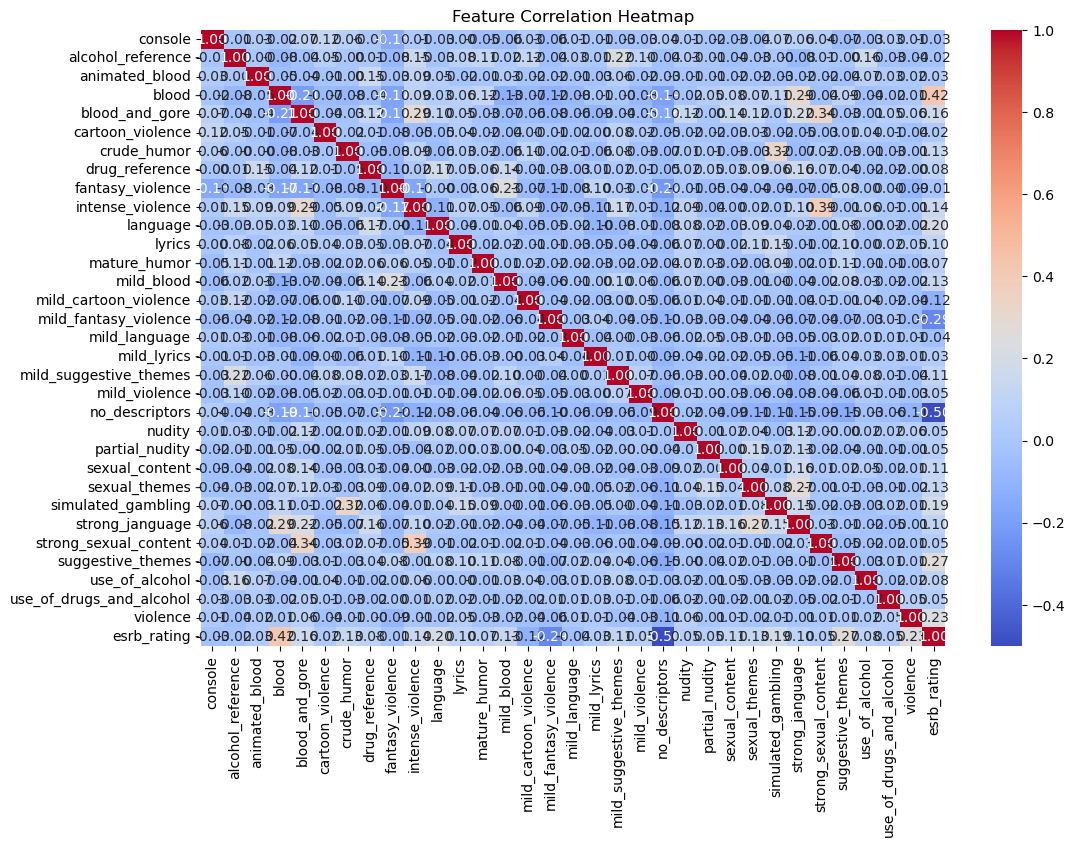

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

Selecting the features and target and splitting the data into training and testing sets

In [44]:
X = df.drop(columns=['esrb_rating'])
y = df['esrb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalizing the features

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Convert to pytorch tensors

In [46]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

Defining the neural network class

In [47]:
class ESRBClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, 64)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(64, 32)
        self.drop = nn.Dropout(0.2)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(32, output_dim)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

Initializing the model

In [48]:
input_dim = X_train.shape[1]
output_dim = len(df['esrb_rating'].unique())
model = ESRBClassifier(input_dim, output_dim)

Defining the training function

In [49]:
def train_model(model, X_train, y_train, epochs=400, lr=0.002):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_arr = []
    
    for epoch in range(epochs):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_arr.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    plt.plot(loss_arr)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

Training the model

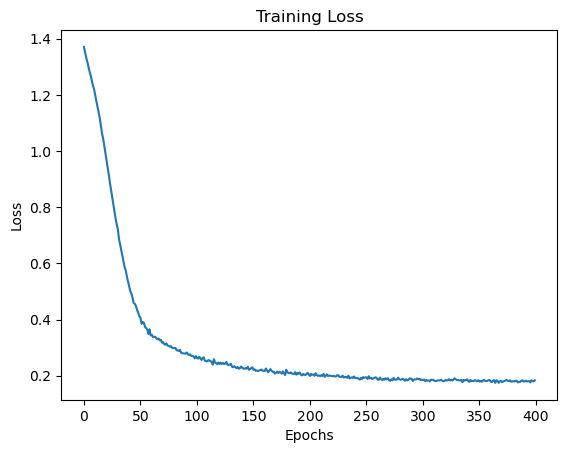

In [50]:
train_model(model, X_train_tensor, y_train_tensor)

Evaluating the model

In [51]:
y_test_pred = model(X_test_tensor)
y_test_pred_labels = torch.argmax(y_test_pred, dim=1)

In [52]:
print("Accuracy:", accuracy_score(y_test_tensor.cpu(), y_test_pred_labels.cpu()))
print("Confusion Matrix:\n", confusion_matrix(y_test_tensor.cpu(), y_test_pred_labels.cpu()))

Accuracy: 0.8654353562005277
Confusion Matrix:
 [[ 97   1   0   1]
 [  3  48   0  10]
 [  0   0  58  15]
 [  0  14   7 125]]


The model works well giving a 86% accuracy score, making some mistakes in predicting the 2nd and 3rd correctly, i.e. M (Mature) and T (Teens) rated games, since these having very similar characteristics defining them.